<a href="https://colab.research.google.com/github/yangste333/Homelessness_Analysis/blob/main/Homelessness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook analyzes the Homelessness data.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yangste333/Homelessness_Analysis/main/Data_prep/homelessness_clean.csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   HUD_unit_occupancy_rate                     374 non-null    float64
 1   asian_perc                                  374 non-null    float64
 2   average_Jan_temperature                     374 non-null    float64
 3   average_summer_temperature                  374 non-null    float64
 4   black_perc                                  374 non-null    float64
 5   city_or_urban                               374 non-null    int64  
 6   coc_number                                  374 non-null    object 
 7   federal_funding_change                      374 non-null    float64
 8   female_perc                                 374 non-null    float64
 9   gini_coefficient_2016                       374 non-null    float64
 10  high_housing_d

In [ ]:
predicted_factors = ['total_homeless_rate', 'unsht_homeless_rate', 'shelt_homeless_rate']
nonimportant_factors = ['total_population', 'year', 'coc_number']

## State your questions

The overall problem is to determine whether and how housing market factors are related to homelessness. To answer this general problem, you will need to ask specific questions about the data.


We want to determine:
- what are the most important factors in determining homelessness rates
- how much does federal funding for COCs affect the homelessness rates (does giving more resources make things better)

## Analysis

The first thing we can do is take every one of the factors and put them together to see if we can predict things properly.

In [ ]:
import statsmodels.formula.api as smf

nonrelevant = ['total_homeless_rate', 'shelt_homeless_rate', 'unsht_homeless_rate', 'year', 'coc_number', 'total_population']

formula = 'total_homeless_rate ~ '
first = True
for n in df:
  if n not in nonrelevant:
    if first:
      first = False
      formula = formula + n
    else:
      formula = formula + ' + ' + n

print(formula)
max_model = smf.ols(formula = formula, data = df).fit()
print(max_model.summary())

total_homeless_rate ~ HUD_unit_occupancy_rate + asian_perc + average_Jan_temperature + average_summer_temperature + black_perc + city_or_urban + federal_funding_change + female_perc + gini_coefficient_2016 + high_housing_density + hisp_perc + house_price_index_2009 + log_median_rent + medicare_reimbursements_per_enrollee + migration_4_year_change + net_migration + number_eviction + p0_19_perc + p65_plus_perc + pacisl_perc + percentage_excessive_drinking + percentage_owners_cost_burden_2016 + percentage_renters_severe_cost_burden_2016 + poverty_rate + proportion_one_person_households + rate_unemployment + rental_vacancy_rate + share_HUD_units + share_built_before_1940 + share_no_bachelors + share_overcrowded_units_2016 + share_renters_2016 + share_under_18_with_single_parent + share_veteran_status + suburban + total_Jan_precipitation + total_annual_precipitation + total_federal_funding + utility_costs
                             OLS Regression Results                            
Dep. V

Clearly not all of these factors are important - so we should probably figure out which ones are most important.

We can see more of "how important each factor is comparatively" by scaling all of the factors to each other relatively.

In [ ]:
x = df[df.columns.difference(predicted_factors).difference(nonimportant_factors)]

x

,HUD_unit_occupancy_rate,asian_perc,average_Jan_temperature,average_summer_temperature,black_perc,city_or_urban,federal_funding_change,female_perc,gini_coefficient_2016,high_housing_density,...,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,total_federal_funding,utility_costs
0,99.000000,0.093952,13.800000,60.799999,0.053811,1,-0.593490,0.489629,42.010002,0,...,0.656341,0.041174,0.397279,0.233791,0.145351,0,1.710000,16.500000,29.36677,8.500000
1,99.000000,0.040104,13.800000,60.799999,0.019530,0,-1.013110,0.467752,40.675701,0,...,0.755604,0.092949,0.339222,0.197866,0.141425,0,1.710000,16.500000,7.60458,14.607715
2,95.083710,0.016632,50.995346,80.874313,0.331147,0,3.708201,0.521677,47.633533,0,...,0.659837,0.012359,0.317696,0.320776,0.091496,1,6.669876,38.593376,89.09627,19.492331
3,87.000801,0.016889,57.893360,81.939949,0.266807,1,1.808279,0.519669,46.713249,0,...,0.745435,0.017127,0.321092,0.336681,0.116479,0,12.296666,58.519012,38.51277,18.899839
4,95.178665,0.004901,48.382103,79.429985,0.090348,0,-1.119620,0.513937,45.165546,0,...,0.823327,0.015400,0.277082,0.279593,0.091350,0,5.462999,44.778618,4.69366,18.803186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,87.321678,0.005103,35.109627,73.512047,0.020074,0,-0.245660,0.511886,45.218510,0,...,0.771229,0.010792,0.275212,0.264135,0.113310,0,4.164744,42.280125,4.13181,16.585392
370,93.790115,0.009916,40.581108,76.372177,0.035123,0,4.781050,0.510895,48.982166,0,...,0.760236,0.010190,0.344758,0.292767,0.104281,0,4.309402,43.476166,21.05300,17.695057
371,95.965622,0.009529,40.225986,75.255028,0.053985,0,-1.092500,0.514122,46.112286,0,...,0.751653,0.010588,0.272593,0.266349,0.105064,1,4.353291,42.982872,12.23910,17.768978
372,89.981705,0.007858,37.575474,73.176598,0.032104,0,17.087120,0.502335,44.832005,0,...,0.798285,0.015970,0.267786,0.234252,0.112785,0,4.592812,43.718338,40.18831,16.804708


As a general rule of thumb, we will use the total homeless rate as the value we are trying to predict - this make sense.

In [ ]:
y = df['total_homeless_rate']

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler().fit(x)

In [ ]:
scaler

RobustScaler()

In [ ]:
maxx = x.agg('max')
minx = x.agg('min')
for n in x.columns:
  x[n] = (x[n]-minx[n])/(maxx[n]-minx[n])


<ipython-input-12-12bd53694080>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[n] = (x[n]-minx[n])/(maxx[n]-minx[n])


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 2180)

In [ ]:
scaler = preprocessing.RobustScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = x.columns)

In [ ]:
X_train['total_federal_funding']

153    -0.410723
138     3.393237
218    -0.003468
219     0.026756
46     28.526809
         ...    
116     0.611989
204    -0.271333
104    -0.231221
128     0.166031
9      -0.245727
Name: total_federal_funding, Length: 317, dtype: float64

In [ ]:
import statsmodels.api as sm

all_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

In [ ]:
all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_homeless_rate   R-squared:                       0.589
Model:                             OLS   Adj. R-squared:                  0.532
Method:                  Least Squares   F-statistic:                     10.19
Date:                 Wed, 24 May 2023   Prob (F-statistic):           9.48e-35
Time:                         02:52:32   Log-Likelihood:                -1189.7
No. Observations:                  317   AIC:                             2459.
Df Residuals:                      277   BIC:                             2610.
Df Model:                           39                                         
Covariance Type:             nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         15.6883      2.081      7.537      0.000      11.591      19.786
HUD_unit_occupancy_rate                       -1.0085      0.812     -1.242      0.215      -2.607       0.591
asian_perc                                    -1.2174      0.897     -1.358      0.176      -2.983       0.548
average_Jan_temperature                        3.4498      2.740      1.259      0.209      -1.945       8.844
average_summer_temperature                     0.0994      2.428      0.041      0.967      -4.681       4.880
black_perc                                    -4.4176      2.067     -2.137      0.033      -8.486      -0.349
city_or_urban                                 -0.6733      2.501     -0.269      0.788      -5.597       4.251
federal_funding_change                        -0.4072      0.244     -1.669      0.096      -0.887       0.073
female_perc                                   -2.1663      1.332     -1.626      0.105      -4.789       0.456
gini_coefficient_2016                          0.1958      1.569      0.125      0.901      -2.893       3.284
high_housing_density                          -2.8094      2.270     -1.238      0.217      -7.278       1.659
hisp_perc                                     -1.5691      1.412     -1.111      0.267      -4.349       1.210
house_price_index_2009                         1.0805      1.106      0.977      0.329      -1.096       3.257
log_median_rent                               10.6903      3.471      3.080      0.002       3.858      17.523
medicare_reimbursements_per_enrollee          -2.3341      1.464     -1.594      0.112      -5.216       0.548
migration_4_year_change                        2.5522      0.791      3.227      0.001       0.995       4.109
net_migration                                 -0.2350      0.373     -0.631      0.529      -0.968       0.498
number_eviction                               -0.4971      0.517     -0.962      0.337      -1.514       0.520
p0_19_perc                                     2.0387      1.903      1.071      0.285      -1.707       5.784
p65_plus_perc                                  0.3226      2.304      0.140      0.889      -4.214       4.859
pacisl_perc                                    0.1481      0.106      1.397      0.164      -0.061       0.357
percentage_excessive_drinking                  1.2016      1.212      0.991      0.322      -1.185       3.588
percentage_owners_cost_burden_2016            -0.0054      2.432     -0.002      0.998      -4.793       4.783
percentage_renters_severe_cost_burden_2016     0.9610      1.324      0.726      0.469      -1.645       3.567
poverty_rate                                  -3.4358      3.010     -1.142

If we try and predict the homelessness rate per 10,000 in this way, we get an OK model:

In [ ]:
y_predict_lr = all_model.predict(sm.add_constant(X_test))

In [ ]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error

print(mean_squared_error(Y_test, y_predict_lr, squared = False))
print(mean_absolute_error(Y_test, y_predict_lr))

7.718217722273765
5.762925537269538


Text(0.5, 0, 'Predicted')

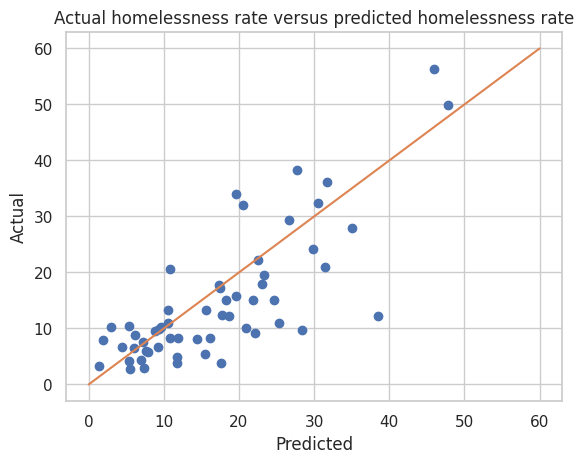

In [ ]:
plt.plot(y_predict_lr, Y_test, 'o')
ex_x = np.linspace(0, 60, 600)
ex_y = ex_x
plt.plot(ex_x, ex_y)
plt.title('Actual homelessness rate versus predicted homelessness rate')
plt.ylabel('Actual')
plt.xlabel('Predicted')

We could absolutely do better though. It looks like, with all of the factors, it's doing a bit of overfitting. As such, we should determine which factors are generally more important than the others.

Since we scaled the factors earlier, we can do some Regularization analysis.

We can start with a Ridge regularization - making sure none of the factors reach zero. The ones with the highest coefficients should be the most important.

Because of the small data set, we will do k-fold validation and average the overall importance of each variable to account for the potential differences in train/test splits.

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso

from sklearn.model_selection import KFold

from sklearn import tree



# Values of k to test
parms = np.arange(1,20)
# Define the set of parameters to tune
tuned_parameters = [{"alphas": [None], 'cv': [5], 'max_iter': [100_000]}]
# Specify the number of folds
n_folds = 5

# Initialize a list to record the RMSE
ridge_rmse = []

# Create the model object
model = RidgeCV()

# Create the k-folds object
loo = KFold(n_splits = 10)
for train_index, test_index in loo.split(x):

  x_train = x.iloc[train_index, :]
  y_train = y.loc[train_index]

  x_test = x.iloc[test_index,:]
  y_test = y.loc[test_index]

  # Do the cross validation
  alphas = 10**np.linspace(-3,5,100)
  lassocv = RidgeCV(alphas = alphas, cv = 5)
  lassocv.fit(x_train, y_train)
    # Fit the model
  lasso_reg = Ridge(alpha = lassocv.alpha_).fit(x_train, y_train)

  lasso_reg.fit(x_train, y_train)

  y_prediction = lasso_reg.predict(x_test)
  coefficients = lasso_reg.coef_.round(3)
  coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

  variables = x.columns
  variables = np.insert(variables, 0, 'intercept')

  lasso_reg_coefs = pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

    # Record the RMSE
  ridge_rmse.append((lasso_reg_coefs, mean_squared_error(y_test, y_prediction, squared=False)))

In [ ]:
rmean_list = {}
for n in x.columns:
  rmean_list[n] = (0, 0)

for model in ridge_rmse:
  m = model[0].iloc[1:,:]
  for b in m.index:
    rmean_list[b] = (rmean_list[b][0]+abs(m.loc[b, 'Estimated Coefficient']), rmean_list[b][1]+1)

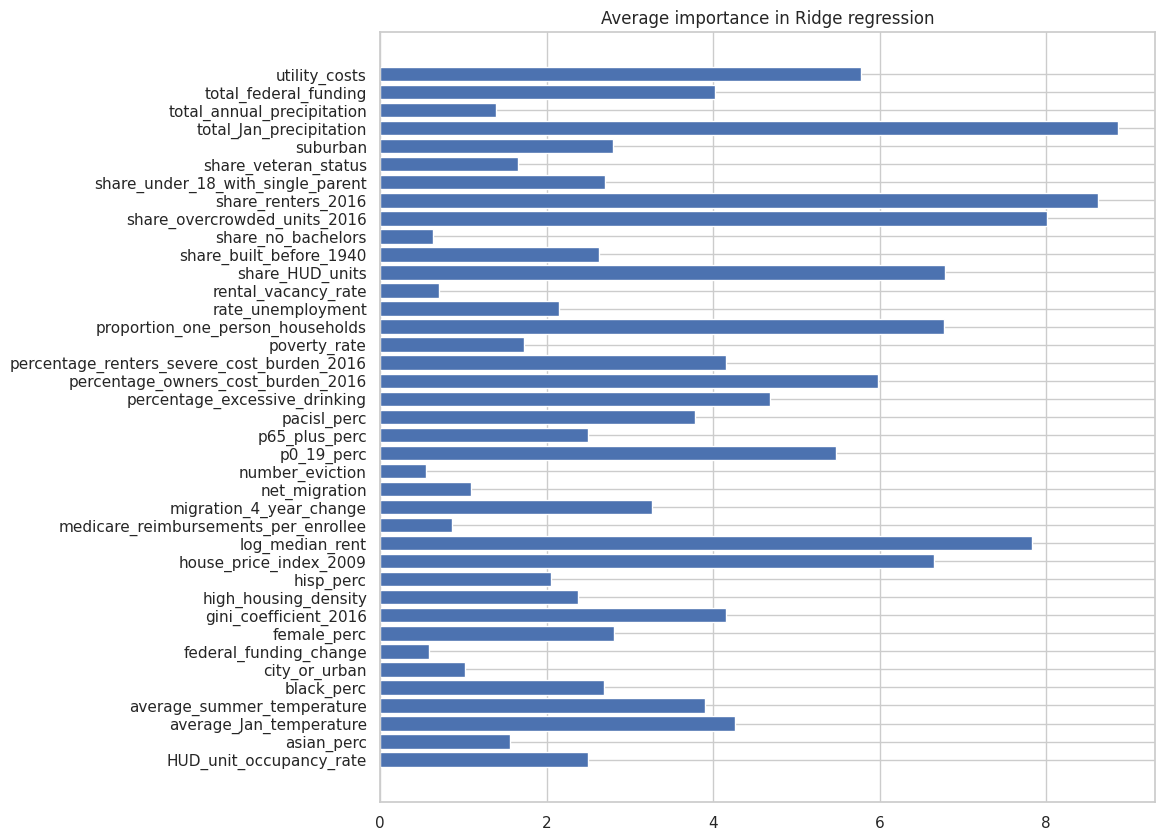

In [ ]:
rmean_list_vals = list(rmean_list.values())
rmean_list_keys = list(rmean_list.keys())

rmean_list_ave = []
for n in rmean_list_vals:
  rmean_list_ave.append(n[0]/n[1])

plt.figure(figsize = (10, 10))
plt.barh(range(len(rmean_list)), rmean_list_ave, tick_label = rmean_list_keys)
plt.title('Average importance in Ridge regression')
plt.show()

The notable "important" factors, the ones that stand out significantly compared to the others, are:

- The total January precipitation
- The share of renters in 2016
- The proportion of one-person households
- The unemployment rate
- The log of the median rent
- The utility costs
- The share of overcrowded units in 2016
- The share of HUD units
- The percentage of owners cost burden in 2016
- The percentage of people from 0-19 in age
- The House Price Index in 2009

In [ ]:
ridge_factors = ['total_Jan_precipitation', 'share_renters_2016', 'proportion_one_person_households', 'rate_unemployment', 'log_median_rent', 'utility_costs', 'share_overcrowded_units_2016', 'share_HUD_units', 'percentage_owners_cost_burden', 'p0_19_perc', 'house_price_index_2009']

If we do a Lasso regularization in the same way, we get a different set of important factors:

In [ ]:
from sklearn.model_selection import KFold

from sklearn import tree

from sklearn.metrics import  mean_squared_error, mean_absolute_error

# Values of k to test
parms = np.arange(1,20)
# Define the set of parameters to tune
tuned_parameters = [{"alphas": [None], 'cv': [5], 'max_iter': [100_000]}]
# Specify the number of folds
n_folds = 5

# Initialize a list to record the RMSE
lasso_rmse = []

# Create the model object
model = LassoCV()

# Create the leave one out object
loo = KFold(n_splits = 10)
for train_index, test_index in loo.split(x):

  x_train = x.iloc[train_index, :]
  y_train = y.loc[train_index]

  x_test = x.iloc[test_index,:]
  y_test = y.loc[test_index]

  # Do the cross validation
  lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
  lassocv.fit(x_train, y_train)
    # Fit the model
  lasso_reg = Lasso(alpha = lassocv.alpha_).fit(x_train, y_train)

  lasso_reg.fit(x_train, y_train)

  y_prediction = lasso_reg.predict(x_test)
  coefficients = lasso_reg.coef_.round(3)
  coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

  variables = x.columns
  variables = np.insert(variables, 0, 'intercept')

  lasso_reg_coefs = pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

    # Record the RMSE
  lasso_rmse.append((lasso_reg_coefs, mean_squared_error(y_test, y_prediction, squared=False)))

In [ ]:
mean_list = {}
for n in x.columns:
  mean_list[n] = (0, 0)

for model in lasso_rmse:
  m = model[0].iloc[1:,:]
  for b in m.index:
    mean_list[b] = (mean_list[b][0]+abs(m.loc[b, 'Estimated Coefficient']), mean_list[b][1]+1)

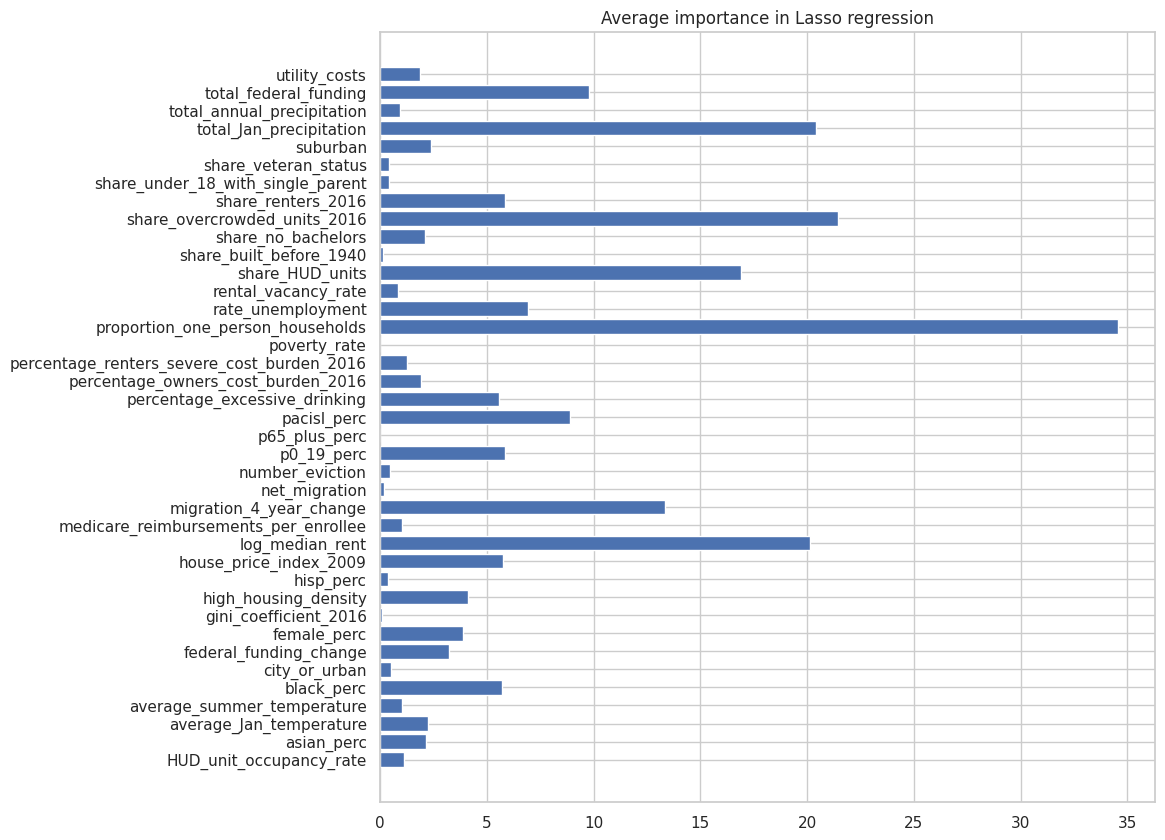

In [ ]:
mean_list_vals = list(mean_list.values())
mean_list_keys = list(mean_list.keys())

mean_list_ave = []
for n in mean_list_vals:
  mean_list_ave.append(n[0]/n[1])

plt.figure(figsize = (10, 10))
plt.barh(range(len(mean_list)), mean_list_ave, tick_label = mean_list_keys)
plt.title('Average importance in Lasso regression')
plt.show()

The most important factors here are:
- Total January precipitation
- The share of overcrowded units in 2016
- The share of HUD units
- The total federal funding
- The log of the median rent
- The proportion of one person households
- The percentage of pacific islanders
- The four-year change in migration

In [ ]:
lasso_factors = ['total_Jan_precipitation', 'share_overcrowded_units_2016', 'share_HUD_units', 'total_federal_funding', 'log_median_rent', 'proportion_one_person_households', 'pacisl_perc', 'migration_4_year_change']

If we look at a model using both of these set of factors, we get this:

In [ ]:
model_factors = ['total_Jan_precipitation', 'share_renters_2016', 'proportion_one_person_households', 'rate_unemployment', 'log_median_rent', 'utility_costs', 'share_overcrowded_units_2016', 'share_HUD_units', 'percentage_owners_cost_burden_2016', 'p0_19_perc', 'house_price_index_2009',
                 'total_federal_funding', 'pacisl_perc', 'migration_4_year_change']
                 
mf_train = X_train[model_factors]
mf_train

,total_Jan_precipitation,share_renters_2016,proportion_one_person_households,rate_unemployment,log_median_rent,utility_costs,share_overcrowded_units_2016,share_HUD_units,percentage_owners_cost_burden_2016,p0_19_perc,house_price_index_2009,total_federal_funding,pacisl_perc,migration_4_year_change
153,-0.394696,-0.591203,-0.892257,0.250354,0.392975,1.066652,-0.301017,-0.348050,0.365382,0.140088,-0.816822,-0.410723,0.034733,0.284148
138,1.746082,-0.243081,-0.142102,0.506777,-0.279507,0.277493,0.336802,0.099149,-0.842156,0.621963,0.358902,3.393237,-0.152111,0.002061
218,-1.210997,0.280152,0.652018,-1.263144,-0.255812,-1.532818,-0.012093,0.152933,-1.253176,0.402351,2.464086,-0.003468,0.049396,-3.795286
219,-1.007399,-0.374301,0.156938,-1.287853,-1.033964,0.482364,-0.143515,-0.105096,-0.749009,0.654445,1.065381,0.026756,0.004668,0.147000
46,1.913417,1.880667,-0.494294,0.272802,1.173063,-1.182593,5.950450,0.390397,1.422958,-0.035251,1.938542,28.526809,2.420104,-0.458051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.347504,-0.600210,-0.609123,-0.091758,0.967902,-0.997088,0.196053,-0.650444,0.591977,0.196502,-0.402576,0.611989,-0.359616,-0.917609
204,3.532070,0.000000,-0.142746,0.841873,-0.339718,0.660435,0.288806,0.526641,-0.228175,0.484489,-0.873566,-0.271333,0.170042,0.282331
104,-0.300312,-1.150032,-1.569218,0.282777,0.647204,0.255069,-0.241606,-0.765899,0.976594,0.607734,-1.028600,-0.231221,-0.235492,0.228146
128,-0.740123,-0.062671,0.125084,-0.597241,-0.807108,0.791941,0.089670,-0.234867,-0.635837,0.688374,0.249536,0.166031,0.612205,-1.261223


In [ ]:
lass_ridge_model = sm.OLS(Y_train, sm.add_constant(mf_train)).fit()
lass_ridge_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_homeless_rate   R-squared:                       0.509
Model:                             OLS   Adj. R-squared:                  0.486
Method:                  Least Squares   F-statistic:                     22.38
Date:                 Wed, 24 May 2023   Prob (F-statistic):           7.19e-39
Time:                         02:53:59   Log-Likelihood:                -1218.0
No. Observations:                  317   AIC:                             2466.
Df Residuals:                      302   BIC:                             2522.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 11.3087      0.769     14.713      0.000       9.796      12.821
total_Jan_precipitation                2.4725      0.477      5.184      0.000       1.534       3.411
share_renters_2016                    -1.0417      1.743     -0.598      0.550      -4.471       2.388
proportion_one_person_households       6.2853      1.647      3.815      0.000       3.044       9.527
rate_unemployment                      1.6168      0.756      2.137      0.033       0.128       3.105
log_median_rent                        4.8010      1.743      2.755      0.006       1.372       8.230
utility_costs                         -2.0281      1.072     -1.892      0.059      -4.138       0.082
share_overcrowded_units_2016           3.9967      1.126      3.550      0.000       1.781       6.212
share_HUD_units                        3.0075      1.251      2.403      0.017       0.545       5.470
percentage_owners_cost_burden_2016    -0.9002      1.883     -0.478      0.633      -4.605       2.805
p0_19_perc                            -1.6330      1.124     -1.452      0.147      -3.846       0.580
house_price_index_2009                 1.1399      0.966      1.180      0.239      -0.762       3.041
total_federal_funding                  0.5317      0.291      1.826      0.069      -0.041       1.105
pacisl_perc                            0.2306      0.082      2.804      0.005       0.069       0.392
migration_4_year_change                2.8845      0.701      4.115      0.000       1.505       4.264
==============================================================================
Omnibus:                      211.425   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3523.017
Skew:                           2.457   Prob(JB):                         0.00
Kurtosis:                      18.575   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, '')

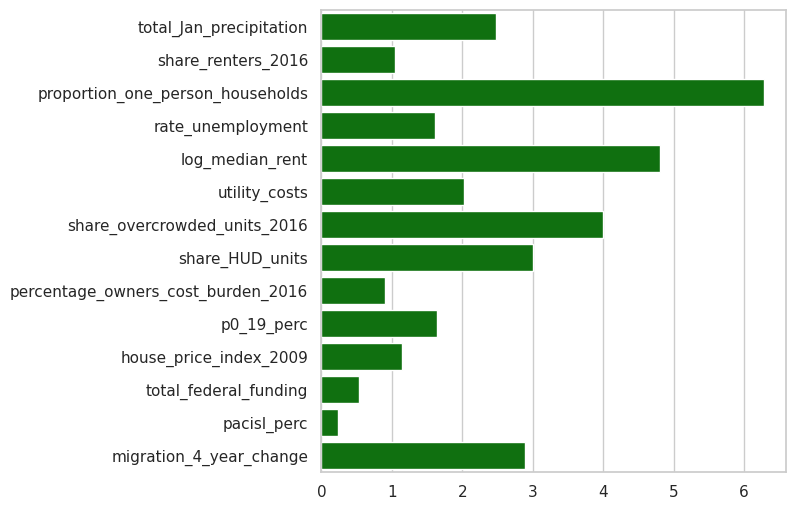

In [ ]:
paramplot = pd.DataFrame(data = [abs(lass_ridge_model.params)])

plt.figure(figsize = (6, 6))
sns.barplot(data = paramplot.loc[:,model_factors], color = 'green', ax = None, orient = 'h')
plt.ylabel(None)

In [ ]:
mf_test = X_test[model_factors]
mf_test_result = lass_ridge_model.predict(sm.add_constant(mf_test))

print('root mean squared error: ', mean_squared_error(Y_test, mf_test_result, squared = False).round(3))
print('mean absolute error: ', mean_absolute_error(Y_test, mf_test_result).round(3))

root mean squared error:  7.76
mean absolute error:  5.779


The root mean squared error and the mean absolute error are approximately similar to the model using all of the factors. However, it's much simpler - only using 14 factors instead of 40-some.

Text(0.5, 0, 'Predicted')

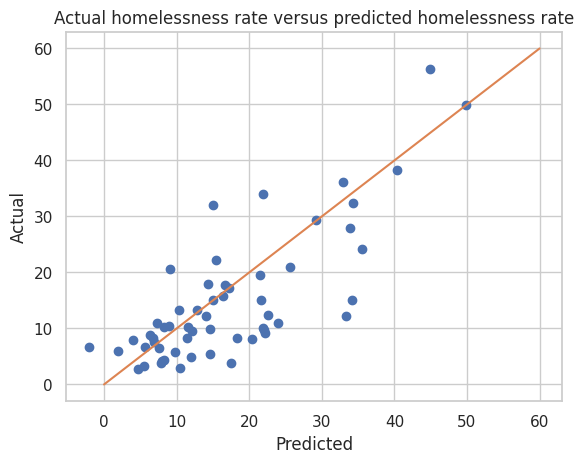

In [ ]:
plt.plot(mf_test_result, Y_test, 'o')
ex_x = np.linspace(0, 60, 600)
ex_y = ex_x
plt.plot(ex_x, ex_y)
plt.title('Actual homelessness rate versus predicted homelessness rate')
plt.ylabel('Actual')
plt.xlabel('Predicted')

We can also try some XGBoost regularization using a similar approach - doing k-fold cross validation and averaging the importances to try and determine the most important factors.

In [ ]:
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.model_selection import KFold

feature_imp = []
# Create the k-fold object
loo = KFold(n_splits = 5)
for train_index, test_index in loo.split(x):
  xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

  params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
  }

  x_train = x.loc[train_index,:]
  y_train = y.loc[train_index]

  x_test = x.loc[test_index,:]
  y_test = y.loc[test_index]

  search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

  search.fit(x_train, y_train)

  model_xgb = xgb.XGBRegressor(objective="reg:squarederror")
  model_xgb.set_params(**search.best_params_)
  model_xgb.fit(x_train, y_train)

  feature_imp.append(model_xgb.feature_importances_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


If we look at the average importance for the features, we get this:

Text(0, 0.5, '')

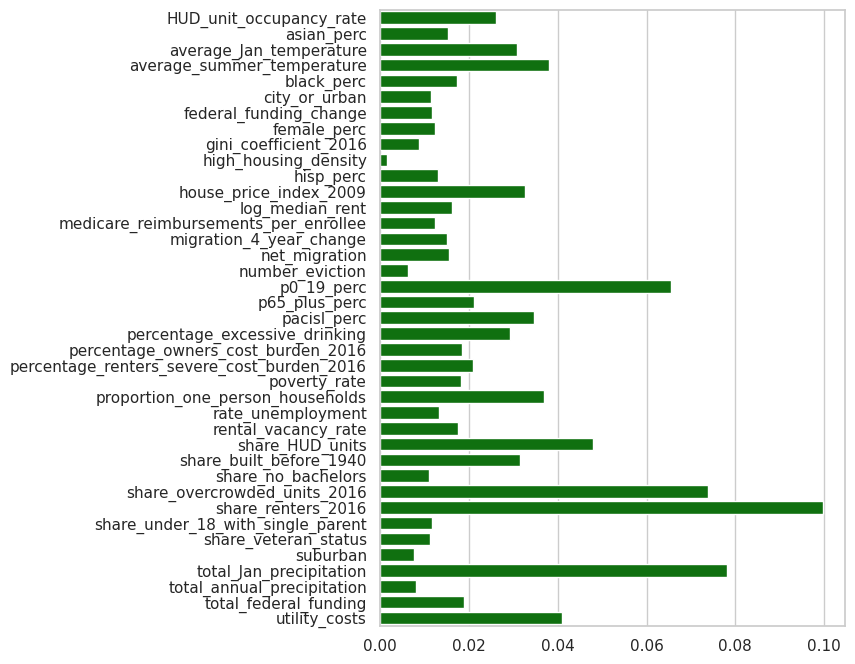

In [ ]:
importance_frame = pd.DataFrame(feature_imp, columns = x.columns)

plt.figure(figsize = (6, 8))
sns.barplot(data = importance_frame.agg(['mean']), color = 'green', ax = None, orient = 'h')
plt.ylabel(None)

Based on this, we can guess that the most important factors are:
- Share of renters in 2016
- The share of overcrowded units in 2016
- The total January precipitation
- The percentage of people who are 0-19 years old
- The average January temperature
- The house price index in 2009
- The proportion of people in one-person households
- The rental vacancy rate
- The share of HUD units
- The utility costs

If we plot a model using those factors, we get this:

In [ ]:
xg_list = ['share_renters_2016', 'share_overcrowded_units_2016', 'total_Jan_precipitation', 'p0_19_perc', 'average_Jan_temperature', 'house_price_index_2009', 'proportion_one_person_households', 'rental_vacancy_rate', 'share_HUD_units', 'utility_costs']


xg_lin_model = sm.OLS(Y_train, sm.add_constant(X_train[xg_list])).fit()
xg_lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_homeless_rate   R-squared:                       0.455
Model:                             OLS   Adj. R-squared:                  0.438
Method:                  Least Squares   F-statistic:                     25.58
Date:                 Wed, 24 May 2023   Prob (F-statistic):           4.58e-35
Time:                         03:09:00   Log-Likelihood:                -1234.5
No. Observations:                  317   AIC:                             2491.
Df Residuals:                      306   BIC:                             2532.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               12.2048      0.775     15.743      0.000      10.679      13.730
share_renters_2016                   0.5751      1.702      0.338      0.736      -2.775       3.925
share_overcrowded_units_2016         5.6270      1.029      5.468      0.000       3.602       7.652
total_Jan_precipitation              2.5170      0.498      5.051      0.000       1.536       3.498
p0_19_perc                          -4.0492      1.026     -3.947      0.000      -6.068      -2.031
average_Jan_temperature             -0.9307      1.286     -0.724      0.470      -3.460       1.599
house_price_index_2009               1.6925      0.964      1.755      0.080      -0.205       3.590
proportion_one_person_households     3.2499      1.485      2.188      0.029       0.327       6.173
rental_vacancy_rate                  0.7557      0.940      0.804      0.422      -1.094       2.606
share_HUD_units                      2.6572      1.192      2.230      0.026       0.312       5.002
utility_costs                       -2.1527      1.356     -1.587      0.113      -4.821       0.516
==============================================================================
Omnibus:                      204.147   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3032.444
Skew:                           2.382   Prob(JB):                         0.00
Kurtosis:                      17.384   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Predicted')

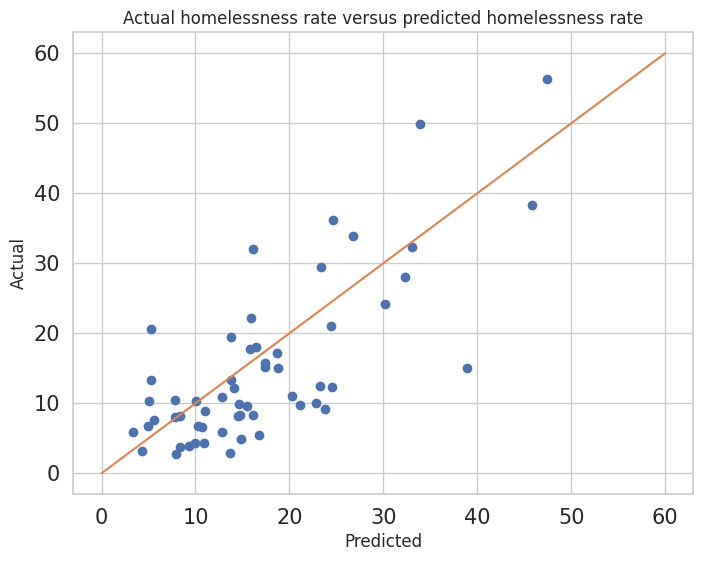

In [ ]:

y_lin_xgb = xg_lin_model.predict(sm.add_constant(X_test[xg_list]))
plt.figure(figsize = (8,6))

plt.plot(y_lin_xgb, Y_test, 'o');
ex_x = np.linspace(0, 60, 600)
ex_y = ex_x
plt.plot(ex_x, ex_y)
plt.tick_params(labelsize = 15)
plt.title('Actual homelessness rate versus predicted homelessness rate')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print('root mean squared error: ', mean_squared_error(Y_test, y_lin_xgb, squared = False).round(3))
print('mean absolute error: ', mean_absolute_error(Y_test, y_lin_xgb).round(3))

root mean squared error:  7.935
mean absolute error:  6.277


If we take one of the random XGBoost algorithms we used, we get this:

Text(0.5, 0, 'Predicted')

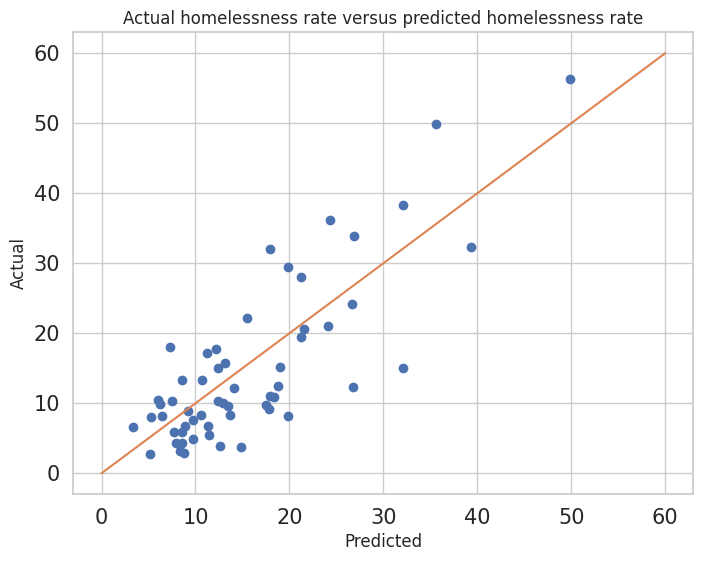

In [ ]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")
model_xgb.set_params(**search.best_params_)
model_xgb.fit(X_train, Y_train)

y_pred_xgb = model_xgb.predict(X_test)
plt.figure(figsize = (8,6))

plt.plot(y_pred_xgb, Y_test, 'o');
ex_x = np.linspace(0, 60, 600)
ex_y = ex_x
plt.plot(ex_x, ex_y)
plt.tick_params(labelsize = 15)
plt.title('Actual homelessness rate versus predicted homelessness rate')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print('root mean squared error: ', mean_squared_error(Y_test, y_pred_xgb, squared = False).round(3))
print('mean absolute error: ', mean_absolute_error(Y_test, y_pred_xgb).round(3))

root mean squared error:  6.75
mean absolute error:  5.6


The errors for both the linear model using the important XGBoost factors and one of the XGBoost factors themselves are a little worse than just taking the 14 factors we determined, but they're pretty good overall.

## Conclusion

The most important factors, depending on the model, are either the proportion of one-person households, the log of the median rent, and the share of overcrowded units in 2016; or the share of renters in 2016, the share of overcrowded units in 2016, and the total January precipitation.

Federal funding in both of the models doesn't seem to be significant compared to the other factors in the model - it affects the needle a little bit, but not as much as the others.